<a href="https://colab.research.google.com/github/akhunzakp/PCVK_2025/blob/main/Week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **D. Praktikum**

**# D1. Operasi Citra Sederhana**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


 Mengubah tingkat kecerahan citra 
----------------------------------
Masukkan nilai kecerahan: 4


/tmp/ipython-input-1518424890.py:19: RuntimeWarning: overflow encountered in scalar add
  brightness_image [y,x,c] = np.clip(original [y,x,c] + brightness, 0, 255,)


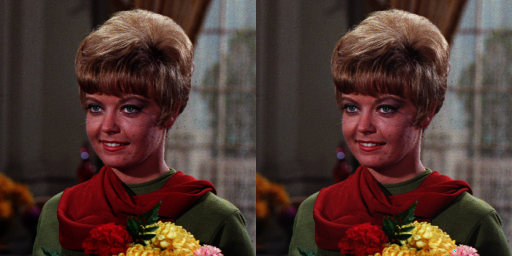

In [13]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

print(' Mengubah tingkat kecerahan citra ')
print('----------------------------------')
try:
    brightness = int(input('Masukkan nilai kecerahan: '))
except ValueError:
    print('Error, not a number')

original = cv2.imread('/content/drive/MyDrive/PCVK/Images/female.tiff')
brightness_image = np.zeros(original.shape, original.dtype)

#akses per piksel
for y in range(original.shape[0]):
   for x in range(original.shape[1]):
      for c in range(original.shape[2]):
          brightness_image [y,x,c] = np.clip(original [y,x,c] + brightness, 0, 255,)
#cara simple tanpa for loop
#brightness_image = cv.convertScaleAbs (original, beta-brightness)

final_frame = cv2.hconcat((original, brightness_image))
cv2_imshow(final_frame)

# **Tugas Praktikum D1**

1. Implementasikan inverse citra pada Google Colaboratory menggunakan formula yang
terdapat pada bagian Ulasan Teori, sehingga menghasilkan keluaran seperti berikut:

 Mengimplementasikan Inverse Citra 
-----------------------------------


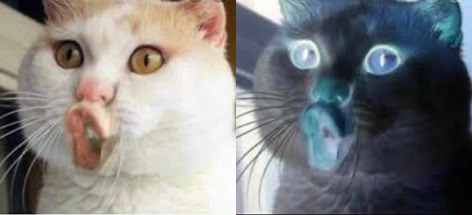

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

print(' Mengimplementasikan Inverse Citra ')
print('-----------------------------------')

image_path = '/content/drive/MyDrive/PCVK/Images/kitten01.jpg'
original_inverse = cv2.imread(image_path)

if original_inverse is None:
    print(f"Error: Tidak dapat memuat gambar dari {image_path}. Mohon periksa kembali jalurnya.")
else:
    # Implementasi Inverse Citra
    # Formula inverse untuk gambar 8-bit adalah 255 - nilai_piksel
    inverted_image = 255 - original_inverse

    # Gabungkan gambar asli dan gambar inverse untuk ditampilkan
    combined_inverse_frame = cv2.hconcat((original_inverse, inverted_image))

    # Tampilkan hasil
    cv2_imshow(combined_inverse_frame)

2. Implementasikan transformasi contrast pada Google Colaboratory menggunakan
formula yang terdapat pada bagian Ulasan Teori untuk kontras, sehingga
menghasilkan keluaran seperti berikut:

 Mengubah kontras dan tingkat kecerahan citra 
------------------------------------------


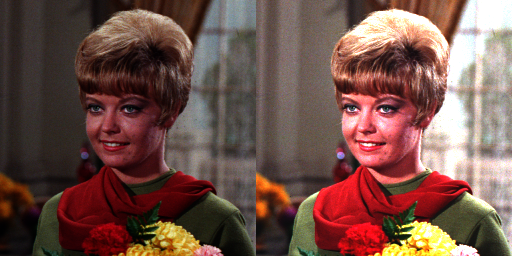

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

print(' Mengubah kontras dan tingkat kecerahan citra ')
print('------------------------------------------')

image_path = '/content/drive/MyDrive/PCVK/Images/female.tiff'
original_contrast = cv2.imread(image_path)

if original_contrast is None:
    print(f"Error: Tidak dapat memuat gambar dari {image_path}. Mohon periksa kembali jalurnya.")
else:
    # Implementasi Transformasi Kontras
    # Formula: new_pixel = alpha * old_pixel + beta
    # alpha > 1 meningkatkan kontras
    # 0 < alpha < 1 mengurangi kontras
    # beta mengatur kecerahan (positif untuk lebih terang, negatif untuk lebih gelap)

    alpha = 2
    beta = 10

    contrast_image = cv2.convertScaleAbs(original_contrast, alpha=alpha, beta=beta)

    combined_contrast_frame = cv2.hconcat((original_contrast, contrast_image))

    # Tampilkan hasil
    cv2_imshow(combined_contrast_frame)

3. Implementasikan transformasi logarithmic brightness pada Google Colaboratory
menggunakan formula yang terdapat pada bagian Ulasan Teori untuk transformasi
log, sehingga menghasilkan keluaran seperti berikut	:


 Mengubah tingkat kecerahan citra dengan Tranformasi Log
------------------------------------------
Masukkan nilai kecerahan : 20


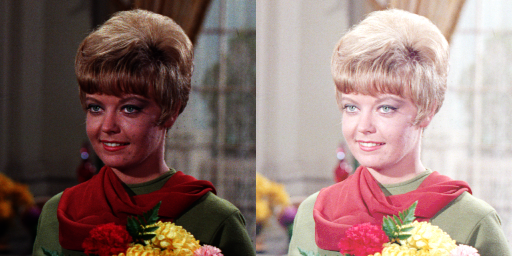

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import math

print(' Mengubah tingkat kecerahan citra dengan Tranformasi Log')
print('------------------------------------------')

image_path = '/content/drive/MyDrive/PCVK/Images/female.tiff'
original_log = cv2.imread(image_path)

if original_log is None:
    print(f"Error: Tidak dapat memuat gambar dari {image_path}. Mohon periksa kembali jalurnya.")
else:
    try:
        brightness = int(input('Masukkan nilai kecerahan : '))
    except ValueError:
        print('Error, not a number')
        brightness = 0 #default


    c = 255 / math.log(1 + 255)  # Menghitung konstanta c based on max possible pixel value

    log_image = np.zeros(original_log.shape, dtype=np.uint8)

    for y in range(original_log.shape[0]):
        for x in range(original_log.shape[1]):
            for c_channel in range(original_log.shape[2]):
                log_image[y, x, c_channel] = np.clip(c * math.log(1 + original_log[y, x, c_channel]) + brightness, 0, 255)


    # Gabungkan gambar asli dan gambar logaritma untuk ditampilkan
    combined_log_frame = cv2.hconcat((original_log, log_image))

    # Tampilkan hasil
    cv2_imshow(combined_log_frame)

4. Implementasikan transformasi grayscale menggunakan metode averaging, lightness,
dan luminance pada Google Colaboratory menggunakan formula yang terdapat pada
bagian Ulasan Teori, sehingga menghasilkan keluaran seperti berikut:

 A. Averaging 
--------------


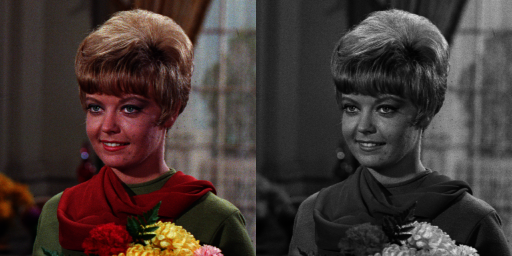

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

print(' A. Averaging ')
print('--------------')

image_path = '/content/drive/MyDrive/PCVK/Images/female.tiff'
original_gray_avg = cv2.imread(image_path)

if original_gray_avg is None:
    print(f"Error: Tidak dapat memuat gambar dari {image_path}. Mohon periksa kembali jalurnya.")
else:

    if len(original_gray_avg.shape) == 3:
        gray_image_avg = np.zeros((original_gray_avg.shape[0], original_gray_avg.shape[1]), dtype=np.uint8)

        for y in range(original_gray_avg.shape[0]):
            for x in range(original_gray_avg.shape[1]):
                b, g, r = original_gray_avg[y, x]
                gray_value = (int(b) + int(g) + int(r)) // 3
                gray_image_avg[y, x] = gray_value

        gray_image_avg_bgr = cv2.cvtColor(gray_image_avg, cv2.COLOR_GRAY2BGR)

        # Gabungkan gambar asli dan gambar grayscale untuk ditampilkan
        combined_gray_avg_frame = cv2.hconcat((original_gray_avg, gray_image_avg_bgr))

        # Tampilkan hasil
        cv2_imshow(combined_gray_avg_frame)
    else:
        print("Gambar sudah dalam format grayscale atau memiliki jumlah channel yang tidak terduga.")

 B. Lightness 
--------------


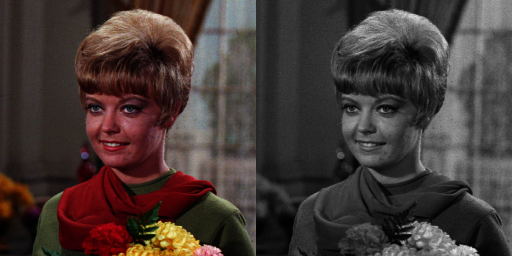

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

print(' B. Lightness ')
print('--------------')

image_path = '/content/drive/MyDrive/PCVK/Images/female.tiff'
original_gray_lightness = cv2.imread(image_path)

if original_gray_lightness is None:
    print(f"Error: Tidak dapat memuat gambar dari {image_path}. Mohon periksa kembali jalurnya.")
else:

    if len(original_gray_lightness.shape) == 3:
        gray_image_lightness = np.zeros((original_gray_lightness.shape[0], original_gray_lightness.shape[1]), dtype=np.uint8)

        for y in range(original_gray_lightness.shape[0]):
            for x in range(original_gray_lightness.shape[1]):
                b, g, r = original_gray_lightness[y, x]
                max_val = max(int(b), int(g), int(r))
                min_val = min(int(b), int(g), int(r))
                gray_value = (max_val + min_val) // 2
                gray_image_lightness[y, x] = gray_value

        gray_image_lightness_bgr = cv2.cvtColor(gray_image_lightness, cv2.COLOR_GRAY2BGR)

        # Gabungkan gambar asli dan grayscale lightness
        combined_lightness_frame = cv2.hconcat((original_gray_lightness, gray_image_lightness_bgr))

        # Tampilkan hasil
        cv2_imshow(combined_lightness_frame)
    else:
        print("Gambar sudah dalam format grayscale atau memiliki jumlah channel yang tidak terduga.")


 C. Luminance 
--------------


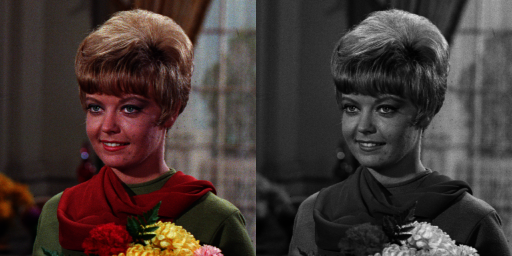

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

print(' C. Luminance ')
print('--------------')

image_path = '/content/drive/MyDrive/PCVK/Images/female.tiff'
original_gray_luminance = cv2.imread(image_path)

if original_gray_luminance is None:
    print(f"Error: Tidak dapat memuat gambar dari {image_path}. Mohon periksa kembali jalurnya.")
else:

    if len(original_gray_luminance.shape) == 3:
        gray_image_luminance = np.zeros((original_gray_luminance.shape[0], original_gray_luminance.shape[1]), dtype=np.uint8)

        for y in range(original_gray_luminance.shape[0]):
            for x in range(original_gray_luminance.shape[1]):
                b, g, r = original_gray_luminance[y, x]
                # Rumus Luminance
                gray_value = int(0.114 * b + 0.587 * g + 0.299 * r)
                gray_image_luminance[y, x] = gray_value

        gray_image_luminance_bgr = cv2.cvtColor(gray_image_luminance, cv2.COLOR_GRAY2BGR)

        # Gabungkan gambar asli dan grayscale luminance
        combined_luminance_frame = cv2.hconcat((original_gray_luminance, gray_image_luminance_bgr))

        # Tampilkan hasil
        cv2_imshow(combined_luminance_frame)
    else:
        print("Gambar sudah dalam format grayscale atau memiliki jumlah channel yang tidak terduga.")


5.	Tampilkanlah warna tertentu pada citra, dan ubah warna lain menjadi grayscale. Misal,
tampilkan warna biru pada citra masukan dan ubah bagian lain yang tidak berwarna
biru menjadi grayscale seperti pada contoh berikut	:


 Menampilkan Warna Biru dan Mengubah Lainnya menjadi Grayscale 
-------------------------------------------------------------


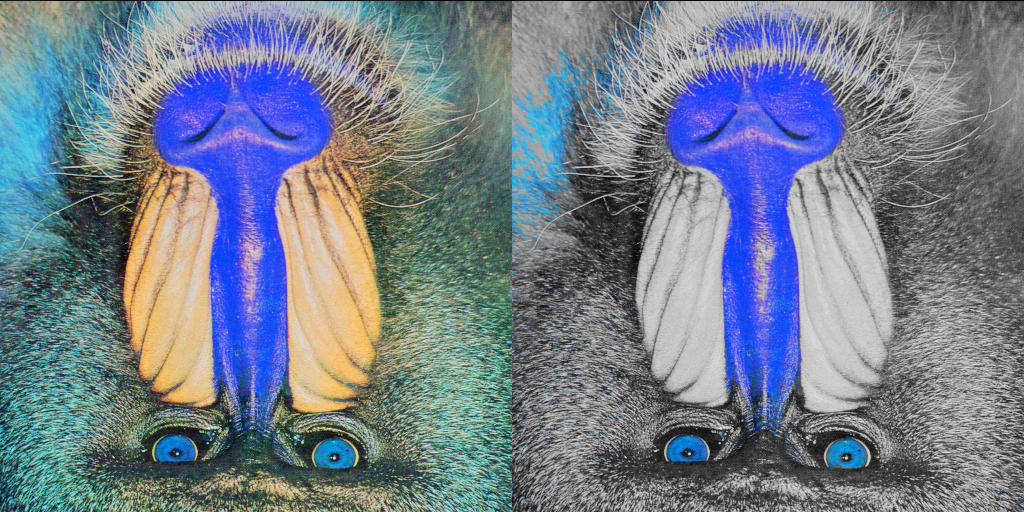

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

print(' Menampilkan Warna Biru dan Mengubah Lainnya menjadi Grayscale ')
print('-------------------------------------------------------------')

image_path = '/content/drive/MyDrive/PCVK/Images/mandrill2.tiff'
original_color_gray = cv2.imread(image_path)

if original_color_gray is None:
    print(f"Error: Tidak dapat memuat gambar dari {image_path}. Mohon periksa kembali jalurnya.")
else:
    # Buat image kosong untuk hasil
    result_image = np.zeros_like(original_color_gray)

    # Iterasi tiap pixel
    for y in range(original_color_gray.shape[0]):
        for x in range(original_color_gray.shape[1]):
            b, g, r = original_color_gray[y, x]

            # Konversi ke int agar tidak overflow
            b, g, r = int(b), int(g), int(r)

            # Threshold warna biru
            blue_threshold = 50
            rg_threshold = 30

            if b > blue_threshold and b > g + rg_threshold and b > r + rg_threshold:
                # Warna biru → tetap berwarna
                result_image[y, x] = [b, g, r]
            else:
                # Selain biru → ubah ke grayscale (luminance)
                gray_value = int(0.114 * b + 0.587 * g + 0.299 * r)
                result_image[y, x] = [gray_value, gray_value, gray_value]

    # Gabungkan gambar asli dan hasil
    combined_color_gray_frame = cv2.hconcat((original_color_gray, result_image))

    # Tampilkan hasil
    cv2_imshow(combined_color_gray_frame)


# **Tugas Praktikum D2**

**# D2. Operasi Operasi Aritmatika dan Logika**

1. Buat Gamma Correction sesuai dengan petunjuk berikut

Gamma Correction pada citra Grayscale
----------------------------------
Masukkan nilai Gamma: 3


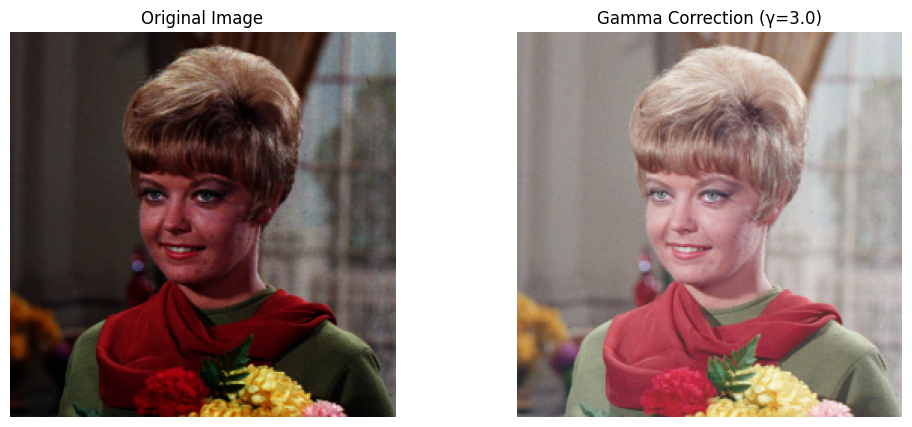

In [4]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

def gamma_correction():
    print('Gamma Correction pada citra Grayscale')
    print('----------------------------------')
    try:
        gamma = float(input('Masukkan nilai Gamma: '))
    except ValueError:
        print('Error, not a number')
        return

    # Load image
    original = cv.imread('/content/drive/MyDrive/PCVK/Images/female.tiff')
    gamma_img = np.zeros(original.shape, original.dtype)

    # Apply gamma correction
    for i in range(original.shape[0]):
        for j in range(original.shape[1]):
            for k in range(original.shape[2]):
                # Gamma correction formula: I' = 255 * (I/255)^(1/gamma)
                normalized = original[i,j,k] / 255.0
                corrected = 255 * (normalized ** (1.0/gamma))
                gamma_img[i,j,k] = int(corrected)

    # Display results
    plt.figure(figsize=(12, 5))
    plt.subplot(1,2,1)
    plt.imshow(cv.cvtColor(original, cv.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1,2,2)
    plt.imshow(cv.cvtColor(gamma_img, cv.COLOR_BGR2RGB))
    plt.title(f'Gamma Correction (γ={gamma})')
    plt.axis('off')
    plt.show()

gamma_correction()

2. Buat Simulasi Image Depth

Simulasi Bit Depth
----------------------------------
Masukkan bit depth (1-7): 4


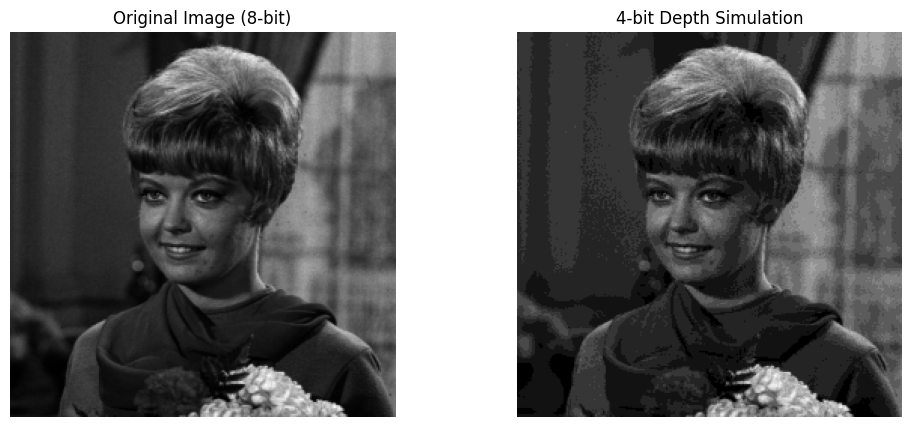

Bit depth: 4
Color levels: 16
Level value: 17.00


In [15]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

def bit_depth_simulation():
    print("Simulasi Bit Depth")
    print('----------------------------------')
    bit_depth = int(input('Masukkan bit depth (1-7): '))

    # Calculate level
    level = 255 / (pow(2, bit_depth) - 1)

    # Load image as grayscale
    original = cv.imread('/content/drive/MyDrive/PCVK/Images/female.tiff', cv.IMREAD_GRAYSCALE)
    if original is None:
        print("Error loading image: /content/drive/MyDrive/PCVK/Images/female.tiff")
        return
    depth_image = np.zeros(original.shape, original.dtype)

    # Apply bit depth reduction
    for i in range(original.shape[0]):
        for j in range(original.shape[1]):
            # Formula: C' = round((C/level) * level)
            depth_image[i,j] = int(round((original[i,j] / level)) * level)

    # Display results
    plt.figure(figsize=(12, 5))
    plt.subplot(1,2,1)
    plt.imshow(original, cmap='gray')
    plt.title('Original Image (8-bit)')
    plt.axis('off')

    plt.subplot(1,2,2)
    plt.imshow(depth_image, cmap='gray')
    plt.title(f'{bit_depth}-bit Depth Simulation')
    plt.axis('off')
    plt.show()

    print(f"Bit depth: {bit_depth}")
    print(f"Color levels: {pow(2, bit_depth)}")
    print(f"Level value: {level:.2f}")

# PSNR Function
def PSNR(img1, img2):
    mse = np.mean((img1 - img2) ** 2)
    if mse == 0:  # MSE 0 means no noise, PSNR has no meaning
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr

bit_depth_simulation()

3. Buat modul Average Denoising

Average Dinoising
----------------------------------
Total noisy images loaded: 0


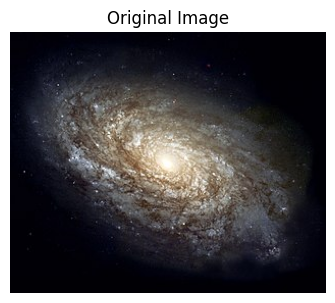


=== HASIL PSNR ===
No. | Jumlah Citra | PSNR (dB)
----|--------------|----------

Kesimpulan:
Semakin banyak citra yang digunakan untuk averaging, semakin tinggi nilai PSNR.
Hal ini menunjukkan bahwa kualitas citra hasil denoising semakin baik.
Noise yang bersifat random akan saling meniadakan ketika di-average,
sehingga citra hasil denoising mendekati citra asli.


In [16]:
def average_denoising():
    print("Average Dinoising")
    print('----------------------------------')

    # Load original image
    original = cv.imread('/content/drive/MyDrive/PCVK/Images/galaxy.jpg')
    if original is None:
        print("Error loading image: /content/drive/MyDrive/PCVK/Images/galaxy.jpg")
        return

    # Load all noisy images
    cv_img = []
    for img in glob.glob('/content/drive/MyDrive/PCVK/noises*.jpg'): # Corrected glob pattern
        n = cv.imread(img)
        if n is not None: # Add check for successful image loading
            cv_img.append(n)


    print(f"Total noisy images loaded: {len(cv_img)}")

    # Test different numbers of images for averaging
    test_counts = [10, 20, 40, 80, 100]
    results = []

    plt.figure(figsize=(20, 4))

    # Only iterate up to the number of loaded images
    for idx in range(min(len(test_counts), len(cv_img))):
        count = test_counts[idx]
        # Average the first 'count' images
        averaged_img = np.zeros(cv_img[0].shape, dtype=np.float64)

        for i in range(count):
            averaged_img += cv_img[i].astype(np.float64)

        averaged_img = (averaged_img / count).astype(np.uint8)

        # Calculate PSNR
        psnr_value = PSNR(original, averaged_img)
        results.append((count, psnr_value))

        # Display result
        plt.subplot(1, 6, idx+1)
        plt.imshow(cv.cvtColor(averaged_img, cv.COLOR_BGR2RGB))
        plt.title(f'{count} images\nPSNR: {psnr_value:.2f} dB')
        plt.axis('off')

    # Show original for comparison
    plt.subplot(1, 6, 6)
    plt.imshow(cv.cvtColor(original, cv.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.axis('off')

    plt.tight_layout()
    plt.show()

    # Print results table
    print("\n=== HASIL PSNR ===")
    print("No. | Jumlah Citra | PSNR (dB)")
    print("----|--------------|----------")
    for i, (count, psnr) in enumerate(results, 1):
        print(f"{i:2d}  | {count:11d}  | {psnr:8.2f}")

    print("\nKesimpulan:")
    print("Semakin banyak citra yang digunakan untuk averaging, semakin tinggi nilai PSNR.")
    print("Hal ini menunjukkan bahwa kualitas citra hasil denoising semakin baik.")
    print("Noise yang bersifat random akan saling meniadakan ketika di-average,")
    print("sehingga citra hasil denoising mendekati citra asli.")

average_denoising()

4. Image Masking

Image Masking
----------------------------------


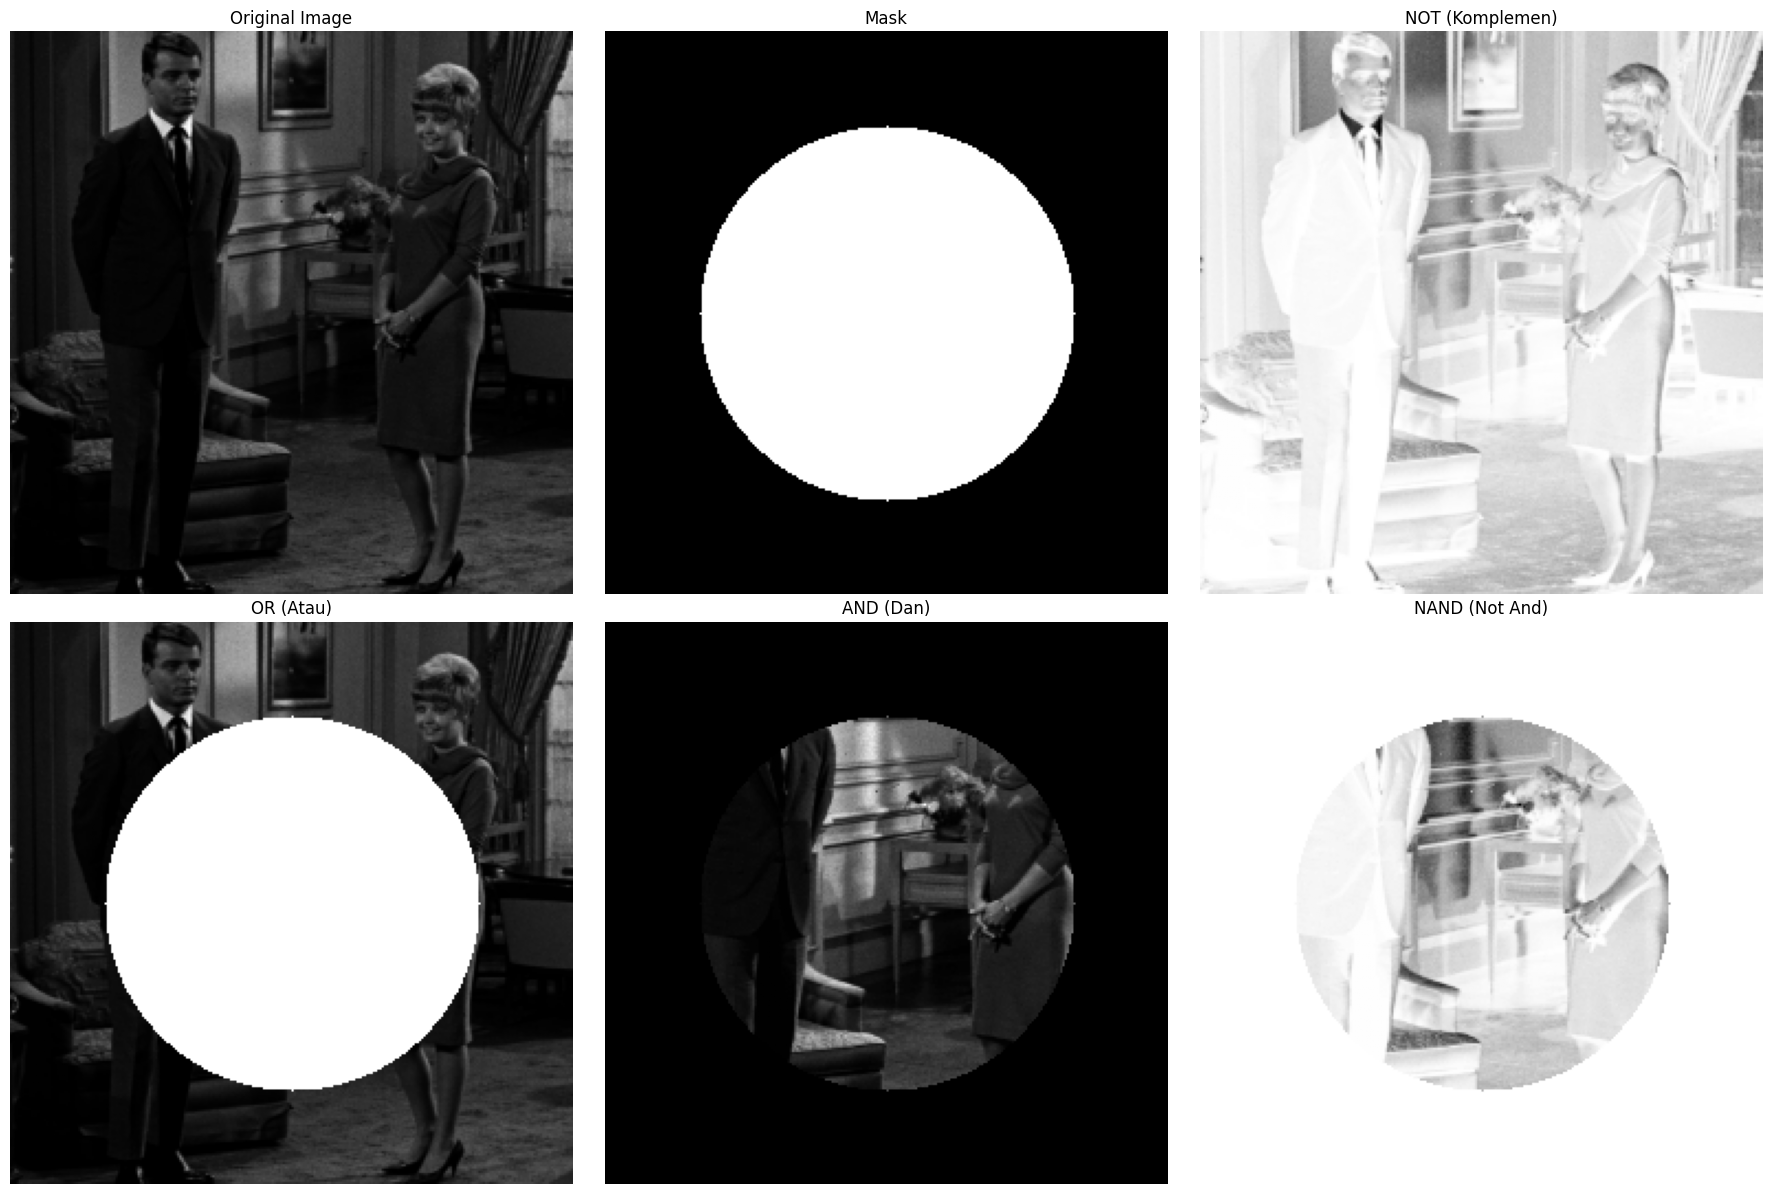


=== ANALISA HASIL ===
1. NOT (Komplemen): Membalik semua nilai pixel (hitam jadi putih, putih jadi hitam)
2. OR (Atau): Menghasilkan pixel putih jika salah satu input putih
3. AND (Dan): Menghasilkan pixel putih hanya jika kedua input putih
4. NAND (Not And): Kebalikan dari operasi AND
5. XOR (Exclusive Or): Menghasilkan pixel putih jika input berbeda


In [17]:
# TUGAS 4: IMAGE MASKING
def image_masking():
    print("Image Masking")
    print('----------------------------------')

    # Load images
    original = cv.imread('/content/drive/MyDrive/PCVK/Images/couple.tiff', cv.IMREAD_GRAYSCALE)
    if original is None:
        print("Error loading image: /content/drive/MyDrive/PCVK/Images/couple.tiff")
        return

    # Create a simple mask (you can modify this based on your needs)
    # For demonstration, creating a circular mask
    mask = np.zeros(original.shape[:2], dtype=np.uint8)
    center = (original.shape[1]//2, original.shape[0]//2)
    radius = min(original.shape[:2])//3
    cv.circle(mask, center, radius, 255, -1)

    # Apply different logical operations
    operations = {
        'NOT (Komplemen)': cv.bitwise_not(original),
        'OR (Atau)': cv.bitwise_or(original, mask),
        'AND (Dan)': cv.bitwise_and(original, mask),
        'NAND (Not And)': cv.bitwise_not(cv.bitwise_and(original, mask)),
        'XOR (Exclusive Or)': cv.bitwise_xor(original, mask)
    }

    # Display results
    plt.figure(figsize=(18, 12))

    # Original image
    plt.subplot(2, 3, 1)
    plt.imshow(original, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')

    # Mask
    plt.subplot(2, 3, 2)
    plt.imshow(mask, cmap='gray')
    plt.title('Mask')
    plt.axis('off')

    # Apply operations
    plot_idx = 3
    for op_name, result in operations.items():
        plt.subplot(2, 3, plot_idx)
        plt.imshow(result, cmap='gray')
        plt.title(op_name)
        plt.axis('off')
        plot_idx += 1
        if plot_idx > 6:
            break

    plt.tight_layout()
    plt.show()

    print("\n=== ANALISA HASIL ===")
    print("1. NOT (Komplemen): Membalik semua nilai pixel (hitam jadi putih, putih jadi hitam)")
    print("2. OR (Atau): Menghasilkan pixel putih jika salah satu input putih")
    print("3. AND (Dan): Menghasilkan pixel putih hanya jika kedua input putih")
    print("4. NAND (Not And): Kebalikan dari operasi AND")
    print("5. XOR (Exclusive Or): Menghasilkan pixel putih jika input berbeda")
image_masking()